# Steps   

### 1. For data visualization part i used an [EDA app](https://github.com/kartikay-99k/EDA-and-Data-Preprocessing-app) which was built by me last week.
### 2. First Handling Numerical values and  filling out the missing values with either mean or random values between (min-75 percentile) depending on the distribution and also removing the garbage values.
### 3. Secondly Handling Categorical values by converting them into dummy variable and filling out missing values with mode.
### 4. Applying statstical test to select best features(chi - square test)
### 5. Re-scaling the numerical values.
### 6. Model bulding.

In [1]:
import pandas as pd
import numpy as np
import random

df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df.head()

,Customer ID,Name,Gender,Age,Income,Income_Stability,Profession,Employment_Type,Location,Loan_Amount_Request,...,Credit_Score,Defaults,Credit_Card_status,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


<AxesSubplot:>

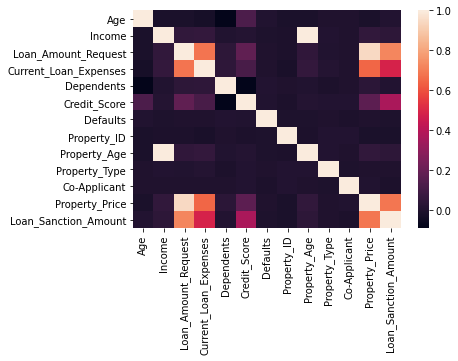

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            30000 non-null  object 
 1   Name                   30000 non-null  object 
 2   Gender                 29947 non-null  object 
 3   Age                    30000 non-null  int64  
 4   Income                 25424 non-null  float64
 5   Income_Stability       28317 non-null  object 
 6   Profession             30000 non-null  object 
 7   Employment_Type        22730 non-null  object 
 8   Location               30000 non-null  object 
 9   Loan_Amount_Request    30000 non-null  float64
 10  Current_Loan_Expenses  29828 non-null  float64
 11  Expense_Type_1         30000 non-null  object 
 12  Expense_Type_2         30000 non-null  object 
 13  Dependents             27507 non-null  float64
 14  Credit_Score           28297 non-null  float64
 15  De

In [4]:
df.isnull().sum()

Customer ID                 0
Name                        0
Gender                     53
Age                         0
Income                   4576
Income_Stability         1683
Profession                  0
Employment_Type          7270
Location                    0
Loan_Amount_Request         0
Current_Loan_Expenses     172
Expense_Type_1              0
Expense_Type_2              0
Dependents               2493
Credit_Score             1703
Defaults                    0
Credit_Card_status       1566
Property_ID                 0
Property_Age             4850
Property_Type               0
Property_Location         356
Co-Applicant                0
Property_Price              0
Loan_Sanction_Amount      340
dtype: int64

In [5]:
df_test.isnull().sum()

Customer ID                 0
Name                        0
Gender                     31
Age                         0
Income                    750
Income_Stability          813
Profession                  0
Employment_Type          4689
Location                    0
Loan_Amount_Request         0
Current_Loan_Expenses      83
Expense_Type_1              0
Expense_Type_2              0
Dependents               1142
Credit_Score              743
Defaults                    0
Credit_Card_status       1076
Property_ID                 0
Property_Age              892
Property_Type               0
Property_Location         160
Co-Applicant                0
Property_Price              0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

## Handling Numerical values

### Age

(array([8855., 4462., 4987., 4426., 7270.]),
 array([18. , 27.4, 36.8, 46.2, 55.6, 65. ]),
 <BarContainer object of 5 artists>)

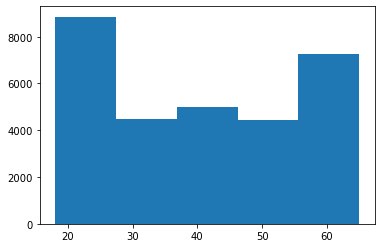

In [7]:
plt.hist(df['Age'],bins=5)

In [8]:
df['Age'].describe()

count    30000.000000
mean        40.092300
std         16.045129
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df_test['Age'].fillna(df['Age'].mean(),inplace=True)

### Income

(array([25424.]),
 array([3.77700000e+02, 1.77746021e+06]),
 <BarContainer object of 1 artists>)

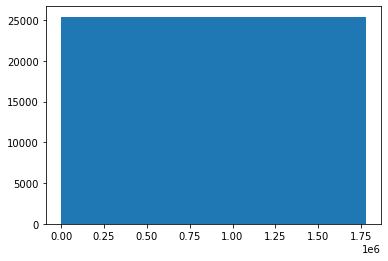

In [10]:
plt.hist(df['Income'],bins=1)

In [11]:
df['Income'].describe()

count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income, dtype: float64

In [12]:
df.loc[(df['Income'].isnull()),'Income']=random.uniform(1.650457e+03,3.090593e+03)
df_test.loc[(df_test['Income'].isnull()),'Income']=random.uniform(1.650457e+03,3.090593e+03)

### Loan_Amount_Request

(array([2.3616e+04, 5.8300e+03, 5.3300e+02, 1.8000e+01, 3.0000e+00]),
 array([  6048.24 , 129138.156, 252228.072, 375317.988, 498407.904,
        621497.82 ]),
 <BarContainer object of 5 artists>)

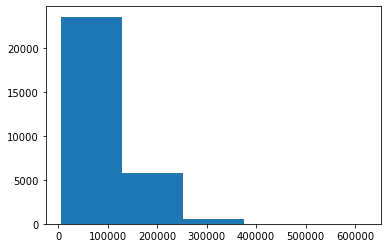

In [13]:
plt.hist(df['Loan_Amount_Request'],bins=5)

In [14]:
df['Loan_Amount_Request'].describe()

count     30000.000000
mean      88826.333855
std       59536.949605
min        6048.240000
25%       41177.755000
50%       75128.075000
75%      119964.605000
max      621497.820000
Name: Loan_Amount_Request, dtype: float64

### Current_Loan_Expenses

(array([1.7700e+02, 0.0000e+00, 1.9183e+04, 9.8080e+03, 6.0500e+02,
        3.8000e+01, 1.1000e+01, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-999.   , -515.012,  -31.024,  452.964,  936.952, 1420.94 ,
        1904.928, 2388.916, 2872.904, 3356.892, 3840.88 ]),
 <BarContainer object of 10 artists>)

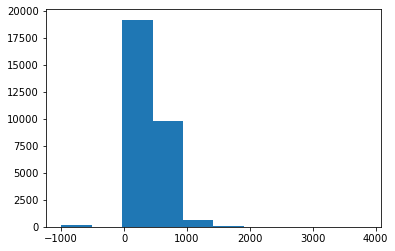

In [15]:
plt.hist(df['Current_Loan_Expenses'],bins=10)

In [16]:
df['Current_Loan_Expenses'].describe()

count    29828.000000
mean       400.936876
std        242.545375
min       -999.000000
25%        247.667500
50%        375.205000
75%        521.292500
max       3840.880000
Name: Current_Loan_Expenses, dtype: float64

In [17]:
df.loc[(df['Current_Loan_Expenses'].isnull()),'Current_Loan_Expenses']=random.uniform(252.140000,521.292500)
df_test.loc[(df_test['Current_Loan_Expenses'].isnull()),'Current_Loan_Expenses']=random.uniform(252.140000,521.292500)

In [18]:
# Negative values to positive (loan expense can't be negative)
df.loc[(df['Current_Loan_Expenses']<0),'Current_Loan_Expenses']=random.uniform(252.140000,521.292500)
df_test.loc[(df_test['Current_Loan_Expenses']<0),'Current_Loan_Expenses']=random.uniform(252.140000,521.292500)

(array([1.7535e+04, 1.0923e+04, 1.3970e+03, 1.0900e+02, 2.2000e+01,
        8.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  33.76 ,  414.472,  795.184, 1175.896, 1556.608, 1937.32 ,
        2318.032, 2698.744, 3079.456, 3460.168, 3840.88 ]),
 <BarContainer object of 10 artists>)

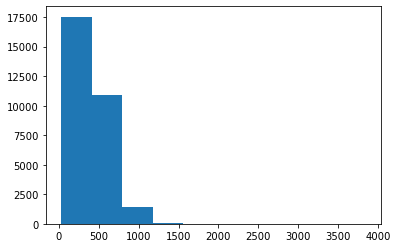

In [19]:
plt.hist(df['Current_Loan_Expenses'],bins=10)

### Credit_Score

(array([ 676., 2274., 3353., 3749., 3884., 3871., 3694., 3470., 2606.,
         720.]),
 array([580.   , 611.626, 643.252, 674.878, 706.504, 738.13 , 769.756,
        801.382, 833.008, 864.634, 896.26 ]),
 <BarContainer object of 10 artists>)

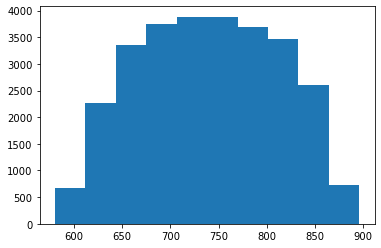

In [20]:
plt.hist(df['Credit_Score'],bins=10)

In [21]:
df['Credit_Score'].describe()

count    28297.000000
mean       739.885381
std         72.163846
min        580.000000
25%        681.880000
50%        739.820000
75%        799.120000
max        896.260000
Name: Credit_Score, dtype: float64

In [22]:
df['Credit_Score'].fillna(df['Credit_Score'].mean(),inplace=True)
df_test['Credit_Score'].fillna(df['Credit_Score'].mean(),inplace=True)

### Property_Age

(array([2.5149e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.77700000e+02, 3.55794202e+05, 7.11210704e+05, 1.06662721e+06,
        1.42204371e+06, 1.77746021e+06]),
 <BarContainer object of 5 artists>)

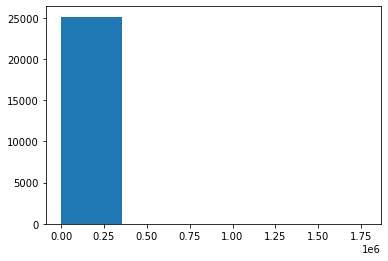

In [23]:
plt.hist(df['Property_Age'],bins=5)

In [24]:
df['Property_Age'].describe()

count    2.515000e+04
mean     2.631119e+03
std      1.132268e+04
min      3.777000e+02
25%      1.650450e+03
50%      2.223250e+03
75%      3.091408e+03
max      1.777460e+06
Name: Property_Age, dtype: float64

In [25]:
df.loc[(df['Property_Age'].isnull()),'Property_Age']=random.uniform(1.650457e+03,3.091408e+03)
df_test.loc[(df_test['Property_Age'].isnull()),'Property_Age']=random.uniform(1.650457e+03,3.091408e+03)

### Dependents

(array([2.4371e+04, 3.1260e+03, 8.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. ]),
 <BarContainer object of 5 artists>)

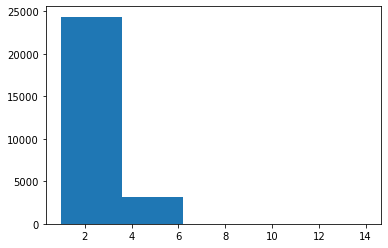

In [26]:
plt.hist(df['Dependents'],bins=5)

In [27]:
df['Dependents'].describe()

count    27507.000000
mean         2.253027
std          0.951162
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: Dependents, dtype: float64

In [28]:
df.loc[(df['Dependents'].isnull()),'Dependents']=random.randint(1,4)
df_test.loc[(df_test['Dependents'].isnull()),'Dependents']=random.randint(1,4)

### Defaults

(array([24182.,     0.,     0.,     0.,  5818.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

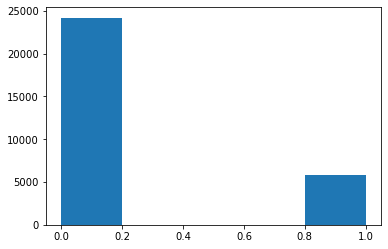

In [29]:
plt.hist(df['Defaults'],bins=5)

In [30]:
df['Defaults'].describe()

count    30000.000000
mean         0.193933
std          0.395384
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Defaults, dtype: float64

In [31]:
df['Defaults'].unique()

array([0, 1], dtype=int64)

### Property_Type

(array([7863., 7650.,    0., 7309., 7178.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. ]),
 <BarContainer object of 5 artists>)

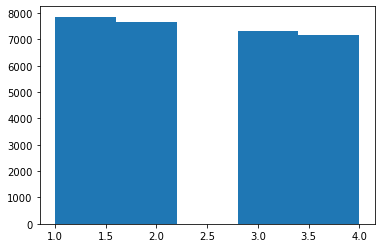

In [32]:
plt.hist(df['Property_Type'],bins=5)

In [33]:
df['Property_Type'].describe()

count    30000.000000
mean         2.460067
std          1.118562
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Property_Type, dtype: float64

In [34]:
df['Property_Type'].unique()

array([4, 2, 1, 3], dtype=int64)

### Co-Applicant

(array([  168.,     0.,     0.,     0., 29832.]),
 array([-999., -799., -599., -399., -199.,    1.]),
 <BarContainer object of 5 artists>)

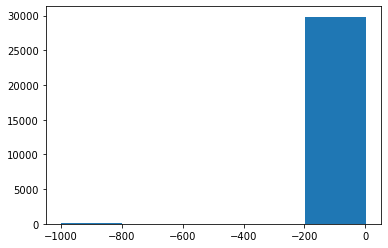

In [35]:
plt.hist(df['Co-Applicant'],bins=5)

In [36]:
df['Co-Applicant'].describe()

count    30000.000000
mean        -4.743867
std         74.614593
min       -999.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Co-Applicant, dtype: float64

In [37]:
df['Co-Applicant'].unique()

array([   1,    0, -999], dtype=int64)

In [38]:
# Replacing all the garbage values (i.e -999)
df.loc[(df['Co-Applicant'] == -999),'Co-Applicant']=random.randint(0,2)
df_test.loc[(df_test['Co-Applicant'] == -999),'Co-Applicant']=random.randint(0,2)

In [39]:
df_test.loc[(df_test['Co-Applicant'] == '?'),'Co-Applicant']=random.randint(0,2)
df_test['Co-Applicant']= df_test['Co-Applicant'].astype(str).astype(float)

### Property_Price

(array([2.4963e+04, 4.7200e+03, 3.0200e+02, 1.2000e+01, 3.0000e+00]),
 array([-9.99000000e+02,  2.14794146e+05,  4.30587292e+05,  6.46380438e+05,
         8.62173584e+05,  1.07796673e+06]),
 <BarContainer object of 5 artists>)

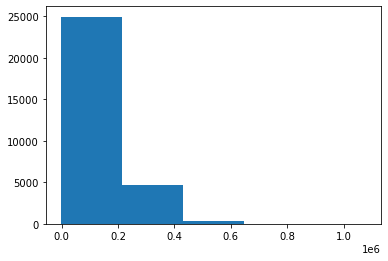

In [40]:
plt.hist(df['Property_Price'],bins=5)

In [41]:
df['Property_Price'].describe()

count    3.000000e+04
mean     1.317597e+05
std      9.354955e+04
min     -9.990000e+02
25%      6.057216e+04
50%      1.099936e+05
75%      1.788807e+05
max      1.077967e+06
Name: Property_Price, dtype: float64

In [42]:
# Negative values to positive (loan expense can't be negative)
df.loc[(df['Property_Price']==-9.990000e+02),'Property_Price']=random.uniform(6.057216e+04,1.788807e+05)
df_test.loc[(df_test['Property_Price']==-9.990000e+02),'Property_Price']=random.uniform(6.057216e+04,1.788807e+05)

In [43]:
df_test.loc[(df_test['Property_Price']=='?'),'Property_Price']=random.uniform(6.057216e+04,1.788807e+05)
df_test['Property_Price']= df_test['Property_Price'].astype(str).astype(float)

##  Handling Categorical values

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

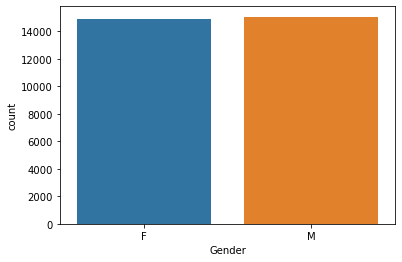

In [44]:
sns.countplot(x="Gender", data=df)

In [45]:
df['Gender'].describe()

count     29947
unique        2
top           M
freq      15053
Name: Gender, dtype: object

In [46]:
df['Gender'].fillna(df['Gender'].mode(),inplace=True)
df_test['Gender'].fillna(df['Gender'].mode(),inplace=True)

In [47]:
dummies_train  = pd.get_dummies(df['Gender'])
dummies_train.drop(['M'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Gender'])
dummies_test.drop(['M'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Gender'],axis=1,inplace=True)
df.drop(['Gender'],axis=1,inplace=True)


### Income_Stability

<AxesSubplot:xlabel='Income_Stability', ylabel='count'>

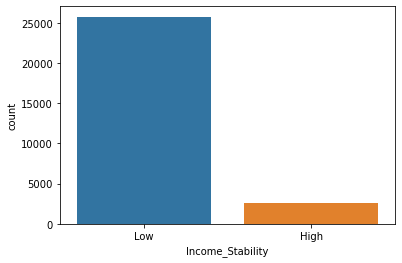

In [48]:
sns.countplot(x="Income_Stability", data=df)

In [49]:
df['Income_Stability'].describe()

count     28317
unique        2
top         Low
freq      25751
Name: Income_Stability, dtype: object

In [50]:
df['Income_Stability'].fillna(df['Income_Stability'].mode(),inplace=True)
df_test['Income_Stability'].fillna(df['Income_Stability'].mode(),inplace=True)

In [51]:
dummies_train  = pd.get_dummies(df['Income_Stability'])
dummies_train.drop(['High'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Income_Stability'])
dummies_test.drop(['High'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Income_Stability'],axis=1,inplace=True)
df.drop(['Income_Stability'],axis=1,inplace=True)

### Property_Location

<AxesSubplot:xlabel='Property_Location', ylabel='count'>

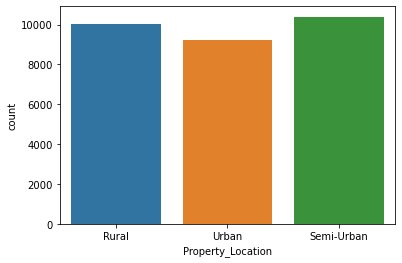

In [52]:
sns.countplot(x="Property_Location", data=df)

In [53]:
df['Property_Location'].describe()

count          29644
unique             3
top       Semi-Urban
freq           10387
Name: Property_Location, dtype: object

In [54]:
df['Property_Location'].fillna(df['Property_Location'].mode(),inplace=True)
df_test['Property_Location'].fillna(df['Property_Location'].mode(),inplace=True)

In [55]:
dummies_train  = pd.get_dummies(df['Property_Location'])
dummies_train.drop(['Semi-Urban'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Property_Location'])
dummies_test.drop(['Semi-Urban'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Property_Location'],axis=1,inplace=True)
df.drop(['Property_Location'],axis=1,inplace=True)

### Location

<AxesSubplot:xlabel='Location', ylabel='count'>

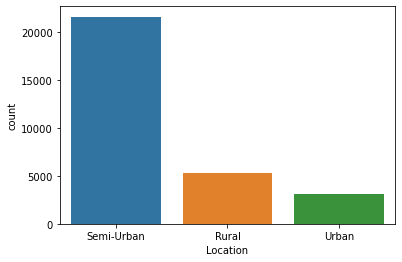

In [56]:
sns.countplot(x="Location", data=df)

In [57]:
df['Location'].describe()

count          30000
unique             3
top       Semi-Urban
freq           21563
Name: Location, dtype: object

In [58]:
df['Location'].fillna(df['Location'].mode(),inplace=True)
df_test['Location'].fillna(df['Location'].mode(),inplace=True)

In [59]:
dummies_train  = pd.get_dummies(df['Location'])
dummies_train.drop(['Urban'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Location'])
dummies_test.drop(['Urban'],axis=1,inplace=True)

dummies_train.columns = ['Semi-Urban','Rural_1']
dummies_test.columns = ['Semi-Urban','Rural_1']

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Location'],axis=1,inplace=True)
df.drop(['Location'],axis=1,inplace=True)

### Expense_Type_1

<AxesSubplot:xlabel='Expense_Type_1', ylabel='count'>

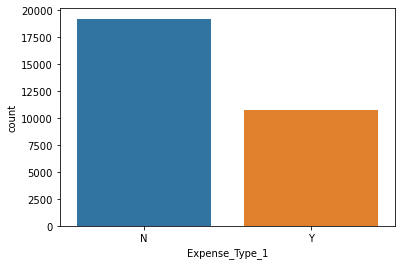

In [60]:
sns.countplot(x="Expense_Type_1", data=df)

In [61]:
df['Expense_Type_1'].describe()

count     30000
unique        2
top           N
freq      19214
Name: Expense_Type_1, dtype: object

In [62]:
dummies_train  = pd.get_dummies(df['Expense_Type_1'])
dummies_train.drop(['N'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Expense_Type_1'])
dummies_test.drop(['N'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Expense_Type_1'],axis=1,inplace=True)
df.drop(['Expense_Type_1'],axis=1,inplace=True)

### Expense_Type_2

<AxesSubplot:xlabel='Expense_Type_2', ylabel='count'>

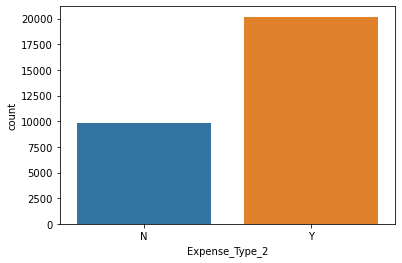

In [63]:
sns.countplot(x="Expense_Type_2", data=df)

In [64]:
df['Expense_Type_2'].describe()

count     30000
unique        2
top           Y
freq      20180
Name: Expense_Type_2, dtype: object

In [65]:
dummies_train  = pd.get_dummies(df['Expense_Type_2'])
dummies_train.drop(['Y'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Expense_Type_2'])
dummies_test.drop(['Y'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Expense_Type_2'],axis=1,inplace=True)
df.drop(['Expense_Type_2'],axis=1,inplace=True)

### Credit_Card_status

<AxesSubplot:xlabel='Credit_Card_status', ylabel='count'>

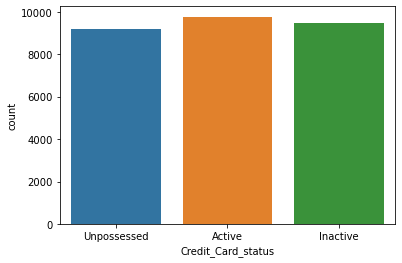

In [66]:
sns.countplot(x="Credit_Card_status", data=df)

In [67]:
df['Credit_Card_status'].describe()

count      28434
unique         3
top       Active
freq        9771
Name: Credit_Card_status, dtype: object

In [68]:
df['Credit_Card_status'].fillna(df['Credit_Card_status'].mode(),inplace=True)
df_test['Credit_Card_status'].fillna(df['Credit_Card_status'].mode(),inplace=True)

In [69]:
dummies_train  = pd.get_dummies(df['Credit_Card_status'])
dummies_train.drop(['Active'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['Credit_Card_status'])
dummies_test.drop(['Active'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['Credit_Card_status'],axis=1,inplace=True)
df.drop(['Credit_Card_status'],axis=1,inplace=True)

#### Filling missing values in Target variable  (Loan_Sanction_Amount)

In [70]:
df['Loan_Sanction_Amount'].describe()

count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan_Sanction_Amount, dtype: float64

In [71]:
# Negative values to positive (loan sanction can't be negative)
df.loc[(df['Loan_Sanction_Amount']<0),'Loan_Sanction_Amount']=random.uniform( 0.000000,74261.250000)

In [72]:
df.loc[(df['Loan_Sanction_Amount'].isnull()),'Loan_Sanction_Amount']=random.uniform(0.000000,74261.250000)

In [73]:
train = df.drop( ['Customer ID','Name','Profession','Employment_Type'] ,axis=1)
test = df_test.drop( ['Customer ID','Name','Profession','Employment_Type'] ,axis=1)

#  Applying statstical test to select best features

In [74]:
X = train.drop(['Loan_Sanction_Amount'], axis = 1)
Y = train['Loan_Sanction_Amount']
Y=Y.astype('int')

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X, Y)

In [76]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [77]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
featureScores

,features,Score
0,Age,1.292809e+05
1,Income,1.206833e+09
2,Loan_Amount_Request,8.989137e+08
3,Current_Loan_Expenses,2.519741e+06
4,Dependents,8.703766e+03
5,Credit_Score,1.295377e+05
6,Defaults,1.593466e+04
7,Property_ID,3.248640e+06
8,Property_Age,1.236109e+09
9,Property_Type,1.003421e+04


In [78]:
print(featureScores.nlargest(22,'Score'))

                 features         Score
11         Property_Price  1.451425e+09
8            Property_Age  1.236109e+09
1                  Income  1.206833e+09
2     Loan_Amount_Request  8.989137e+08
7             Property_ID  3.248640e+06
3   Current_Loan_Expenses  2.519741e+06
5            Credit_Score  1.295377e+05
0                     Age  1.292809e+05
6                Defaults  1.593466e+04
16             Semi-Urban  1.557383e+04
21            Unpossessed  1.370941e+04
15                  Urban  1.363431e+04
20               Inactive  1.351086e+04
14                  Rural  1.312809e+04
19                      N  1.304371e+04
18                      Y  1.264007e+04
9           Property_Type  1.003421e+04
12                      F  9.931796e+03
4              Dependents  8.703766e+03
17                Rural_1  5.532583e+03
13                    Low  3.262405e+03
10           Co-Applicant  2.103891e+03


# Scaling / Noramlizing values / Transforming skewed values


In [79]:
from scipy import stats

# np.log(train['Property_Age'])
# np.log(test['Property_Age'])
# np.log(train['Income'])
# np.log(test['Income'])
stats.boxcox(train['Property_Age'])[0]
stats.boxcox(train['Income'])[0]
stats.boxcox(test['Income'])[0]
stats.boxcox(test['Property_Age'])[0]

array([5.73287104, 5.199474  , 5.23399856, ..., 5.52437306, 5.42566555,
       5.92276918])

In [80]:
train['Age']=(train['Age']-train['Age'].mean())/train['Age'].std()
test['Age']=(test['Age']-test['Age'].mean())/test['Age'].std()

# train['Income']=(train['Income']-train['Income'].mean())/train['Income'].std()
# test['Income']=(test['Income']-test['Income'].mean())/test['Income'].std()

train['Current_Loan_Expenses']=(train['Current_Loan_Expenses']-train['Current_Loan_Expenses'].mean())/train['Current_Loan_Expenses'].std()
test['Current_Loan_Expenses']=(test['Current_Loan_Expenses']-test['Current_Loan_Expenses'].mean())/test['Current_Loan_Expenses'].std()

train['Loan_Amount_Request']=(train['Loan_Amount_Request']-train['Loan_Amount_Request'].mean())/train['Loan_Amount_Request'].std()
test['Loan_Amount_Request']=(test['Loan_Amount_Request']-test['Loan_Amount_Request'].mean())/test['Loan_Amount_Request'].std()

train['Credit_Score']=(train['Credit_Score']-train['Credit_Score'].mean())/train['Credit_Score'].std()
test['Credit_Score']=(test['Credit_Score']-test['Credit_Score'].mean())/test['Credit_Score'].std()

# train['Property_Age']=(train['Property_Age']-train['Property_Age'].mean())/train['Property_Age'].std()
# test['Property_Age']=(test['Property_Age']-test['Property_Age'].mean())/test['Property_Age'].std()

train['Property_ID']=(train['Property_ID']-train['Property_ID'].mean())/train['Property_ID'].std()
test['Property_ID']=(test['Property_ID']-test['Property_ID'].mean())/test['Property_ID'].std()

train['Property_Price']=(train['Property_Price']-train['Property_Price'].mean())/train['Property_Price'].std()
test['Property_Price']=(test['Property_Price']-test['Property_Price'].mean())/test['Property_Price'].std()



# Model building

In [81]:
from sklearn.model_selection import train_test_split

X = train.drop(['Loan_Sanction_Amount'], axis = 1)
Y = train['Loan_Sanction_Amount']


In [82]:
x_train,x_test,y_train,y_test  = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [83]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(24000, 22) (24000,)
(6000, 22) (6000,)


In [84]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.6438907541424413
0.6420580533442379


In [85]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(scoring="r2",
                          alphas=[0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10],cv=5)
ridge_model.fit(x_train,y_train)
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.6438907541424412
0.6420580538173172


In [86]:
# from sklearn.linear_model import LassoCV
# lasso_model = LassoCV(alphas=[0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10],cv=5)
# lasso_model.fit(x_train,y_train)
# y_train_pred = lasso_model.predict(x_train)
# y_test_pred = lasso_model.predict(x_test)
# print(r2_score(y_true=y_train,y_pred=y_train_pred))
# print(r2_score(y_true=y_test,y_pred=y_test_pred))


In [87]:
# from sklearn.linear_model import ElasticNetCV
# enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
#                     alphas = [1, 0.1, 0.01, 0.001, 0.0005], cv=5)
# enet_model.fit(x_train, y_train)

# # predict
# y_train_pred = enet_model.predict(x_train)
# y_test_pred = enet_model.predict(x_test)
# print(r2_score(y_train,y_train_pred))
# print(r2_score(y_test,y_test_pred))

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
extra_model = ExtraTreesRegressor(criterion='mse', random_state=0, n_jobs=-1, 
                                min_samples_leaf=1, max_depth=20, 
                                min_samples_split=3, n_estimators=1000
                               )

extra_model.fit(x_train, y_train)

# predict
y_train_pred = extra_model.predict(x_train)
y_test_pred = extra_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9936521517652854
0.7732850374792143


In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9678413607381042
0.7749424159198233


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.7876856545233185
0.7686722478939468


In [91]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(x_train,y_train)
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9732114326431757
0.7562268238211218


In [92]:
import sklearn.base as skb
class MixModel(skb.BaseEstimator,skb.RegressorMixin,skb.TransformerMixin):
    def __init__(self,algs):
        self.algs = algs
    def fit(self,X,y):
        self.algs_ = [skb.clone(x) for x in self.algs]
        for alg in self.algs_:
            alg.fit(X,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return np.mean(predictions,axis=1)

In [93]:
mixed_model = MixModel(algs = [xgb,rf,extra_model])
mixed_model.fit(x_train, y_train)
y_train_pred = mixed_model.predict(x_train)
y_test_pred = mixed_model.predict(x_test)
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.98287585667515
0.7777312006390565


In [94]:
results = mixed_model.predict(test)
results

array([ 8.58270041e+04,  6.22529598e+04, -3.56440715e+03, ...,
       -5.04836077e+01,  7.18829099e+04,  7.61386545e+04])

In [95]:
results=abs(results)

In [96]:
submission = pd.DataFrame({
       "Customer ID": df_test["Customer ID"],
       "Loan Sanction Amount (USD)": results
   })
submission.to_csv('sub1.csv', index=False)